In [1]:
# necessary imports
import nn_module as n
import math
import torch
from torch import Tensor
import matplotlib.pyplot as plt

In [2]:
def generate_disc_set(nb):
    '''
    Generates the dataset
    parameters:
    nb   : Number of samples to be generated
    returns:
    input, target   : The input data and target label
    '''
    input = Tensor(nb, 2).uniform_(-1, 1)
    target = input.pow(2).sum(1).sub(2 / math.pi).sign().add(1).div(2).view(nb,1)
    return input, target

In [3]:
# generate the datasets (train and test)
train_input, train_target = generate_disc_set(1000)
test_input, test_target = generate_disc_set(1000)

In [4]:
%%capture
# normalize the inputs
mean, std = train_input.mean(), train_input.std()
train_input.sub_(mean).div_(std)
test_input.sub_(mean).div_(std)

# create class labels (2 dimensional output)
train_target = torch.cat((train_target, 1-train_target), dim=1)
test_target = torch.cat((test_target, 1-test_target), dim=1)

In [5]:
# initialise the test network
test_net = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])

In [6]:
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.SGD(test_net, lossf)

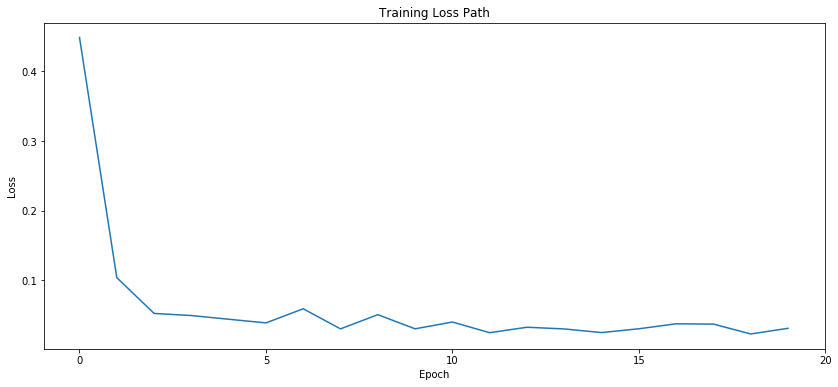

In [7]:
# train the model
losspath = optim.train(train_input, train_target, 20, 1e-2)
plt.figure(figsize= (14,6))
plt.plot(losspath)
plt.title('Training Loss Path')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([0, 5, 10, 15, 20],[0, 5, 10, 15, 20])
plt.show()

In [8]:
# final training set loss
train_loss = lossf.loss(test_net.forward(train_input), train_target).item()
print('Final training set loss: {:.4f}'.format(train_loss))

Final training set loss: 0.0421


In [9]:
# final test set loss
test_loss = lossf.loss(test_net.forward(test_input), test_target).item()
print('Final test set loss: {:.4f}'.format(test_loss))

Final test set loss: 0.0399


In [10]:
# showcase parameter return function (returns dict of dicts)
test_net.param()

{'layer0': {'bias': tensor([[-0.4546, -0.5406, -0.0310, -0.1928, -0.9206, -0.1793, -0.5859, -0.5627,
           -0.4663,  0.2870, -0.1646, -0.6029, -0.4675, -0.3427, -0.3731, -0.3181,
           -0.4094,  0.1418, -0.6135, -0.2698, -0.8861, -0.4259, -0.3937, -0.3384,
           -0.1849]]),
  'weights': tensor([[ 0.4041,  1.1401,  0.0194,  0.0789,  0.1957, -0.3708, -0.9794, -0.7595,
            0.2034, -0.0241,  0.2470, -0.6155,  0.4169,  0.6511,  0.6609,  0.2624,
           -0.5489,  0.0098,  1.0688,  0.1680, -0.2671, -0.6919, -0.5490, -0.7075,
           -0.2683],
          [-0.5427, -0.4294,  0.0551,  0.4770, -1.4318, -0.1827,  0.2640, -0.5028,
            0.9451,  0.0749,  0.2268, -0.8245,  0.6007,  0.1407,  0.1410, -0.4675,
            0.0363, -0.0299,  0.2402,  0.4508,  1.2508,  0.1440,  0.6733, -0.0976,
           -0.1129]])},
 'layer1': {'bias': tensor([[ 0.0000, -0.0213,  0.4677, -0.1438, -0.1289, -0.1343,  0.0117,  0.2896,
           -0.0189, -0.1134, -0.0070, -0.1156, -0.0641,

In [11]:
def plot_result(points, labels, title = None, ax = plt):
    '''
    plot the points with their labels
    '''
    labels = labels.view(-1,1)
    # use labels==labels+1 to create zero bytes
    mask1x = torch.cat((labels==1, labels==labels+1), 1)
    mask1y = torch.cat((labels==labels+1, labels==1), 1)
    mask0x = torch.cat((labels==0, labels==labels+1), 1)
    mask0y = torch.cat((labels==labels+1, labels==0), 1)
    ax.scatter(points[mask1x], points[mask1y], label = '1')
    ax.scatter(points[mask0x], points[mask0y], label = '0')
    ax.legend()
    if ax==plt:
        plt.title(title)
    else:
        ax.set_title(title)


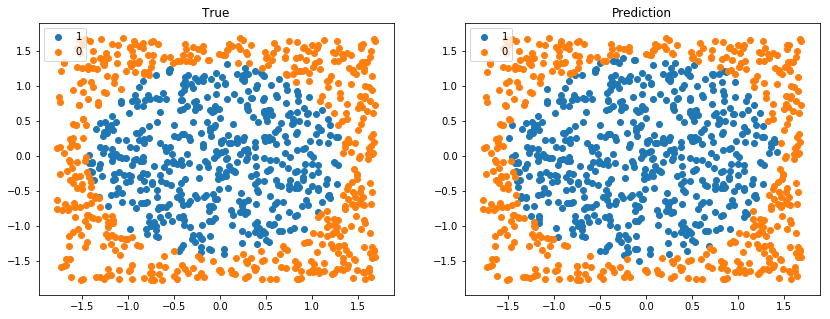

In [12]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)